# Двухфакторный ANOVA с post-hoc тестированием

Загружаем необходимые модули:

In [31]:
import pandas as pd
import numpy as np
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import matplotlib.pyplot as plt
import scipy.stats as st
import warnings
warnings.filterwarnings('ignore')

Загрузка данных, поскольку полный набор слишком большой, убедимся, что данные верные, посмотрев на первые 5 строк.

In [67]:
invest_data=pd.read_excel('Invest_raw.xls')
invest_data.head()

,InvPol,InvestType,Eff
0,Social,Real,7
1,Social,Real,9
2,Social,Real,6
3,Social,Real,10
4,Social,Real,11


Указываем параметры для модели ANOVA и выполняем анализ:

In [68]:
inv_formula='Eff ~ C(InvPol)+C(InvestType)+C(InvPol):C(InvestType)'
inv_model=ols(inv_formula, invest_data).fit()
tab=anova_lm(inv_model, type=2).iloc[:-1,:]

Рассмотрим таблицу результатов: 

Первая строчка, **С(InvPol)** содержит информацию о влиянии фактора инвестиционной политики на эффективность инвестирования. 

**p-value** $\approx 0.18$, (колонка **PR(>F)**) не отклоняем нулевую гипотезу о равентсве средних в выборках, сгруппированным по видам инвестиционной политики.

Вторая строчка, **С(InvestType)** содержит информацию о влиянии фактора типа инвестиций на эффективность инвестирования.

**p-value** << 0.05, принимаем альтернативную гипотезу о неравенстве средних в выборках, сгруппированных по типу инвестиций.

Третья строчка **C(InvPol):C(InvestType)** содержит информацию о наличии взаимодействия между факторами инвестиционной политики и типа инвестиций. 

**p-value** << 0.05, принимаем альтернативную гипотезу о наличии взаимодействия между факторами.

In [69]:
tab

,df,sum_sq,mean_sq,F,PR(>F)
C(InvPol),2.0,37.166667,18.583333,1.775882,1.818135e-01
C(InvestType),1.0,252.083333,252.083333,24.089875,1.433697e-05
C(InvPol):C(InvestType),2.0,641.166667,320.583333,30.635950,6.231744e-09


### Построим графики с 95% доверительными интервалами  для среднего:

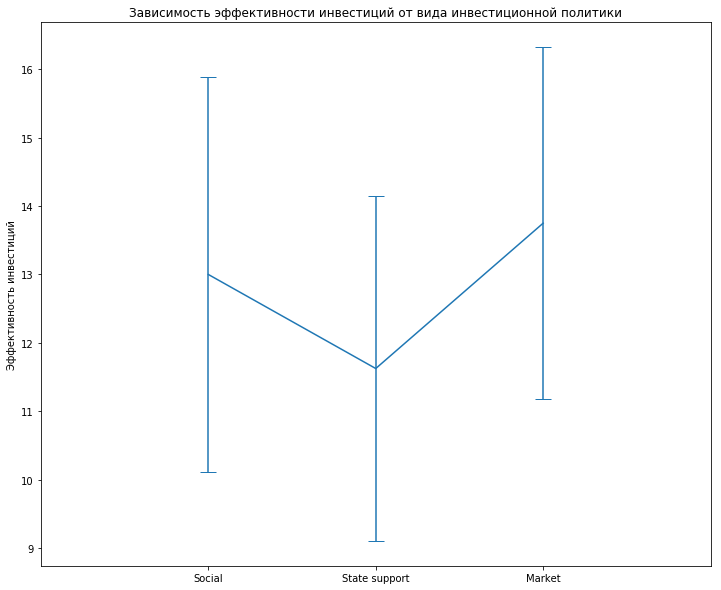

In [72]:
plt.figure(figsize=[12, 10])
plt.xlim([-1, 3])
plt.errorbar([0, 1, 2], [invest_data[invest_data['InvPol']==x]['Eff'].mean() for x in invest_data['InvPol'].unique()],
           [1.96*st.sem(invest_data[invest_data['InvPol']==x]['Eff']) for x in invest_data['InvPol'].unique()],
            capsize=8)
_=plt.xticks([0, 1, 2], [x for x in invest_data['InvPol'].unique()])
_=plt.ylabel('Эффективность инвестиций')
_=plt.title('Зависимость эффективности инвестиций от вида инвестиционной политики')

На первом графике изображены средние значения эффективности инвестирования для выборок, сгруппированных по типам инвестиционной политики. Усы - 95% доверительный интервал для среднего. Видно, что средние каждой из групп покрываются доверительными интервалами других, что соответсвует результату дисперсионного анализа, в ходе которого мы отвергли альтернативную гипотезу о неравентсве средних в данных группах.

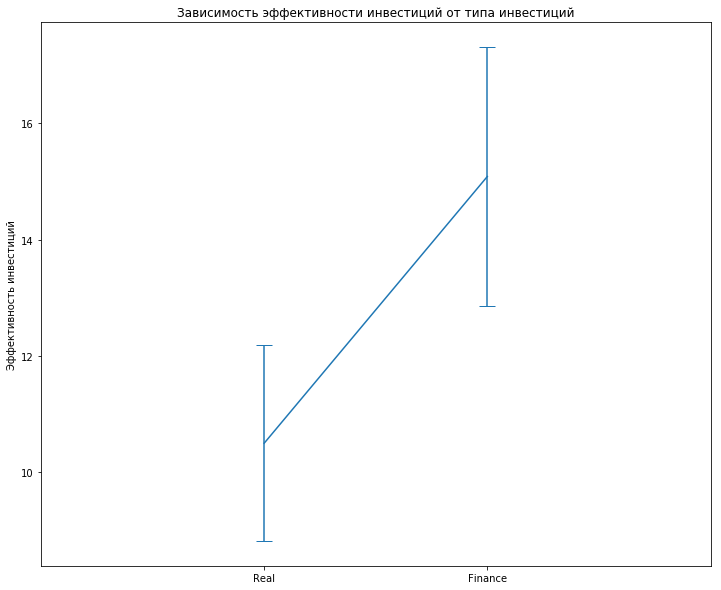

In [74]:
plt.figure(figsize=[12, 10])
plt.xlim([-1, 2])
plt.errorbar([0, 1], [invest_data[invest_data['InvestType']==x]['Eff'].mean() for x in invest_data['InvestType'].unique()],
           [1.96*st.sem(invest_data[invest_data['InvestType']==x]['Eff']) for x in invest_data['InvestType'].unique()],
            capsize=8)
_=plt.xticks([0, 1], [x for x in invest_data['InvestType'].unique()])
_=plt.ylabel('Эффективность инвестиций')
_=plt.title('Зависимость эффективности инвестиций от типа инвестиций')

Средние выборок, сгруппированных по типу инвестиций значимо отличаются, что было выявлено в результате дисперсионного анализа, **p-value** << 0.05. По графику также видно, что доверительные интервалы не то что не покрывают средние друг друга, но даже не пересекаются.

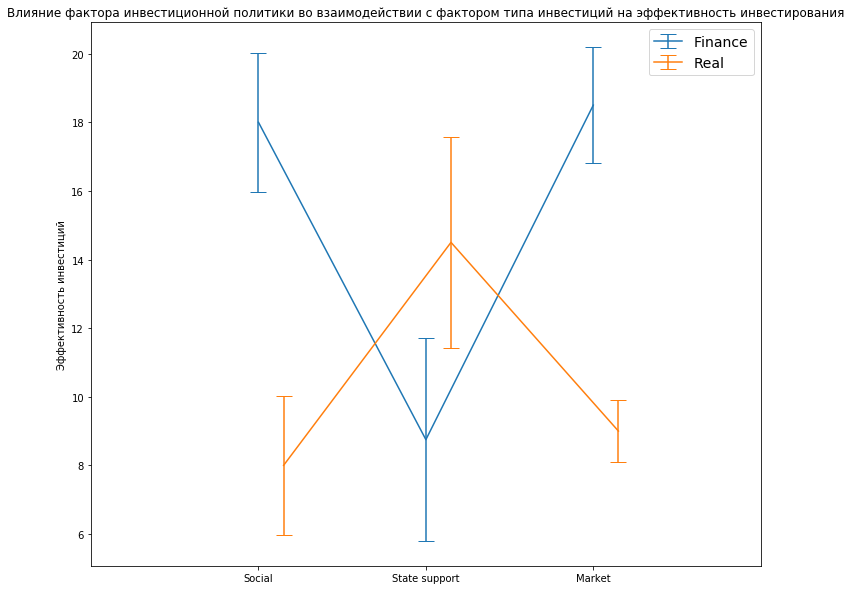

In [73]:
plt.figure(figsize=[12, 10])
plt.xlim([-1, 3])
plt.errorbar([0, 1, 2], [invest_data[(invest_data['InvPol']==x)&(invest_data['InvestType']=='Finance')]['Eff'].mean() for x in invest_data['InvPol'].unique()],
           [1.96*st.sem(invest_data[(invest_data['InvPol']==x)&(invest_data['InvestType']=='Finance')]['Eff']) for x in invest_data['InvPol'].unique()],
            capsize=8, label='Finance')
plt.errorbar([0.15, 1.15, 2.15], [invest_data[(invest_data['InvPol']==x)&(invest_data['InvestType']=='Real')]['Eff'].mean() for x in invest_data['InvPol'].unique()],
           [1.96*st.sem(invest_data[(invest_data['InvPol']==x)&(invest_data['InvestType']=='Real')]['Eff']) for x in invest_data['InvPol'].unique()],
            capsize=8, label='Real')
_=plt.xticks([0, 1, 2], [x for x in invest_data['InvPol'].unique()])
plt.legend(fontsize=14)
_=plt.ylabel('Эффективность инвестиций')
_=plt.title('Влияние фактора инвестиционной политики во взаимодействии с фактором типа инвестиций на эффективность инвестирования')

График синего цвета соответсвует выборкам финансовых инвестиций, оранжевого, выборкам реальных инвестиций. Взаимодействие факторов можно проследить, поскольку теперь присутствуют различия, непокрываемые 95% доверительными интервалами между группами по инвестиционной политике, внутри каждого из типов инвестиций. А именно, отличается эффективность инвестиционной политики, ориентирующейся на государственную поддержку (State support), как в группе финансовых, так и в группе реальных инвестиций. В случае финансовых инвестиций, эффективность такой политики ниже, чем рыночной и социально-ориентированной, в случае реальных инвестиций - выше.

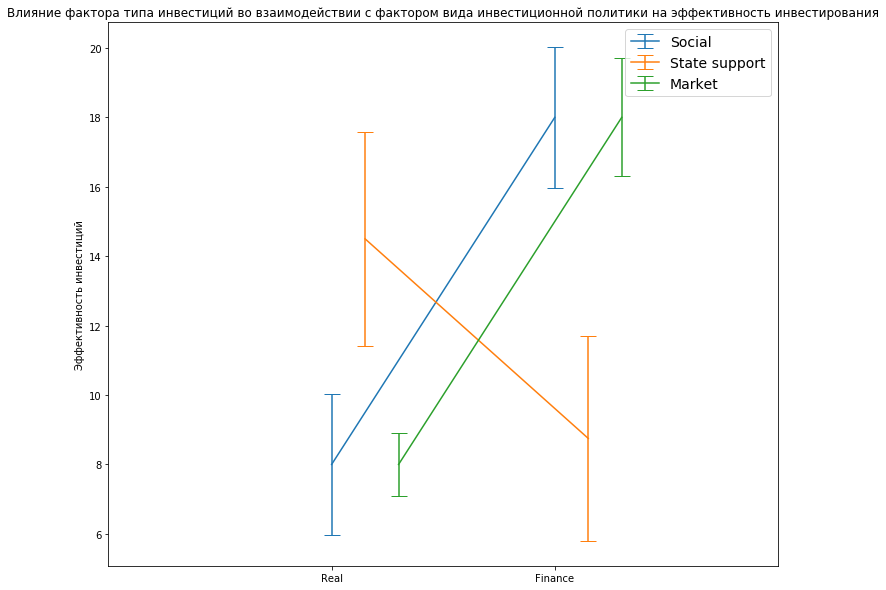

In [70]:
plt.figure(figsize=[12, 10])
plt.xlim([-1, 2])
plt.errorbar([0, 1], [invest_data[(invest_data['InvestType']==x)&(invest_data['InvPol']=='Social')]['Eff'].mean() for x in invest_data['InvestType'].unique()],
           [1.96*st.sem(invest_data[(invest_data['InvestType']==x)&(invest_data['InvPol']=='Social')]['Eff']) for x in invest_data['InvestType'].unique()],
            capsize=8, label='Social')
plt.errorbar([0.15, 1.15], [invest_data[(invest_data['InvestType']==x)&(invest_data['InvPol']=='State support')]['Eff'].mean() for x in invest_data['InvestType'].unique()],
           [1.96*st.sem(invest_data[(invest_data['InvestType']==x)&(invest_data['InvPol']=='State support')]['Eff']) for x in invest_data['InvestType'].unique()],
            capsize=8, label='State support')
plt.errorbar([0.3, 1.3], [invest_data[(invest_data['InvestType']==x)&(invest_data['InvPol']=='Social')]['Eff'].mean() for x in invest_data['InvestType'].unique()],
           [1.96*st.sem(invest_data[(invest_data['InvestType']==x)&(invest_data['InvPol']=='Market')]['Eff']) for x in invest_data['InvestType'].unique()],
            capsize=8, label='Market')
_=plt.xticks([0, 1], [x for x in invest_data['InvestType'].unique()])
plt.legend(fontsize=14)
_=plt.ylabel('Эффективность инвестиций')
_=plt.title('Влияние фактора типа инвестиций во взаимодействии с фактором вида инвестиционной политики на эффективность инвестирования')

Рассмотрим обратную группировку, синий график - инвестиции при социально-ориентированной политике, оранжевый - государственно-ориентированной, зеленый - рыночной. Опять же, мы наблюдаем ту же картину, взаимодействие факторов проявляется при государственно-ориентированной политике. Ее эффективность выше, в случае реальных инвестиций, ниже, в случае финансовых.

### Проведем post-hoc тестирование, чтобы выявить, какие именно градации факторов оказывают влияние на эффективность инвестирования:

В качестве post-hoc теста выберем критерий достоверно значимой разницы Тьюки (Tukey's honestly significant difference test), импортируем необходимые модули:

In [80]:
import statsmodels.stats.multicomp as mcomp

In [87]:
mc1=mcomp.MultiComparison(invest_data['Eff'], invest_data['InvPol'])
print(mc1.tukeyhsd())

 Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1     group2    meandiff  lower  upper  reject
---------------------------------------------------
Market     Social     -0.75   -5.4131 3.9131 False 
Market State support  -2.125  -6.7881 2.5381 False 
Social State support  -1.375  -6.0381 3.2881 False 
---------------------------------------------------


Результаты по множественным сравнениям для средних выборок, сгруппированных по типу политики. На уровне значимости 0.05 мы не можем отвергнуть ни одну из гипотез о равенстве средних, колонка **reject**, значения **False**.

В принципе, данный анализ можно было и не проводить, так как раньше ANOVA уже показал, что разницы в средних по этому фактору не наблюдается.

In [97]:
mc2=mcomp.MultiComparison(invest_data['Eff'], invest_data['InvestType'])
print(mc2.tukeyhsd())

Multiple Comparison of Means - Tukey HSD,FWER=0.05
 group1 group2 meandiff  lower   upper  reject
----------------------------------------------
Finance  Real  -4.5833  -7.4478 -1.7189  True 
----------------------------------------------


Разница между средним финансовых инвестиций и реальных наблюдается. Поскольку тут гипотеза всего одна, можно было обойтись и обычным t-тестом, а не тестом на множественные сравнения.

In [96]:
invest_data['Comb_fact']=invest_data.apply(lambda x: x['InvestType']+'-'+x['InvPol'], axis=1)
mc3=mcomp.MultiComparison(invest_data['Eff'], invest_data['Comb_fact'])
print(mc3.tukeyhsd())

             Multiple Comparison of Means - Tukey HSD,FWER=0.05             
        group1                group2        meandiff  lower    upper  reject
----------------------------------------------------------------------------
    Finance-Market        Finance-Social      -0.5   -5.3286   4.3286 False 
    Finance-Market    Finance-State support  -9.75   -14.5786 -4.9214  True 
    Finance-Market         Real-Market        -9.5   -14.3286 -4.6714  True 
    Finance-Market         Real-Social       -10.5   -15.3286 -5.6714  True 
    Finance-Market      Real-State support    -4.0   -8.8286   0.8286 False 
    Finance-Social    Finance-State support  -9.25   -14.0786 -4.4214  True 
    Finance-Social         Real-Market        -9.0   -13.8286 -4.1714  True 
    Finance-Social         Real-Social       -10.0   -14.8286 -5.1714  True 
    Finance-Social      Real-State support    -3.5   -8.3286   1.3286 False 
Finance-State support      Real-Market        0.25   -4.5786   5.0786 False 

Наконец, множественные сравнения для взаимодействия факторов. Перечислим сравнения, для которых наблюдается разница средних, согласно критерию Тьюки на уровне значимости 0.05:

1. Финансовые инвестиции при государственно-ориентированной политике - Финансовые инвестиции при рыночной

2. Финансовые при рыночной - Реальные при рыночной

3. Финансовые при рыночной - Реальные при социально-ориентированной

4. Финансовые при социально-ориентированной - Финансовые при государственно-ориентированной

5. Финансовые при социально-ориентированной - Реальные при рыночной

6. Финансовые при социально-ориентированной - Реальные при социально-ориентированной

7. Финансовые при государственно-ориентированной - Реальные при государственно-ориентированной

8. Реальные при рыночной - реальные при социально-ориентированной

9. Реальные при социально-ориентированной - реальные при государственно-ориентированной

Ту же ситуацию можно наблюдать и на построенных выше графиках с доверительными интервалами. Однако подобные графики нельзя использовать для строгих статистических выводов в ситуации множественных сравнений.